## Aula 05: Detecção de Anomalias #02

## Hoje (última aula!)

- Detecção de anomalias usando Árvores de Decisão
- Detecção de anomalias usando agrupamento
- Detecção de anomalias usando predição

### Detecção de anomalias usando predição

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
sns.set()
plt.rcParams["figure.figsize"] = (15, 8)

In [3]:
df = pd.read_csv("data/serie_de_mentirinha.csv")
data = np.array(df["data"])

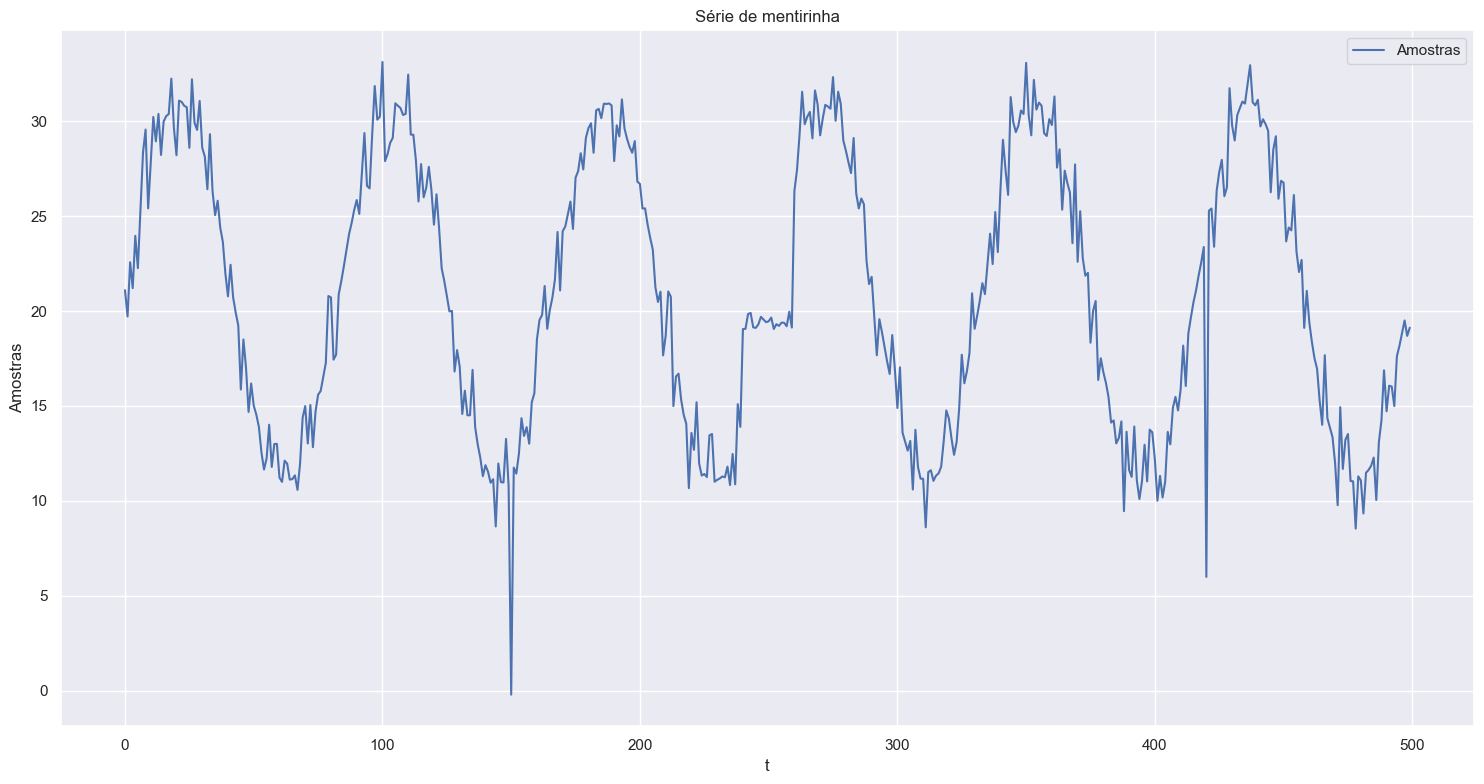

In [4]:
plt.plot(data, label="Amostras")
plt.title("Série de mentirinha")
plt.xlabel("t")
plt.ylabel("Amostras")
plt.legend()
plt.tight_layout()
plt.show()

### Detecção de anomalias usando Árvores de Decisão

[Documentação scikit-learn da classe IsolationForest.](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [22]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

out_fraction = 0.005
detector = IsolationForest(contamination=out_fraction)
detector = detector.fit(data_scaled)

anomalies = detector.predict(data_scaled)

idx = np.where(anomalies == -1)

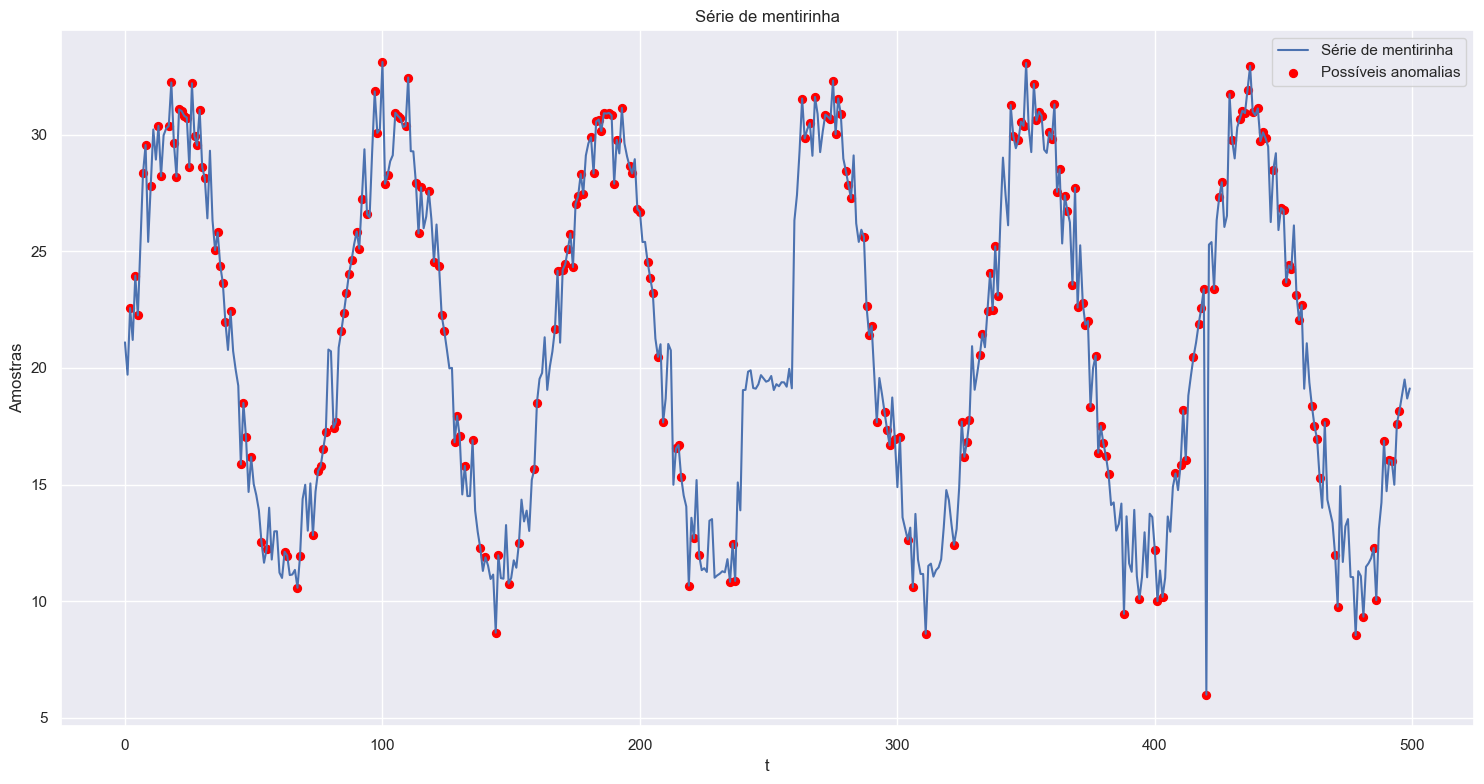

In [21]:
plt.plot(data, label="Série de mentirinha")
plt.scatter(idx, data[idx], s=32, color="red", label="Possíveis anomalias")
plt.title("Série de mentirinha")
plt.xlabel("t")
plt.ylabel("Amostras")
plt.legend()
plt.tight_layout()
plt.show()

### Detecção de anomalias usando agrupamento

- k-Médias

In [8]:
from sklearn.cluster import KMeans

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

kmeans = KMeans(n_clusters=9, random_state=0)
kmeans = kmeans.fit(data_scaled)

In [9]:
u, c = np.unique(kmeans.labels_, return_counts=True)
k_idx = np.where(kmeans.labels_ == 0)[0]

In [24]:
c

array([ 2, 64, 46, 79, 43, 53, 72, 73, 68], dtype=int64)

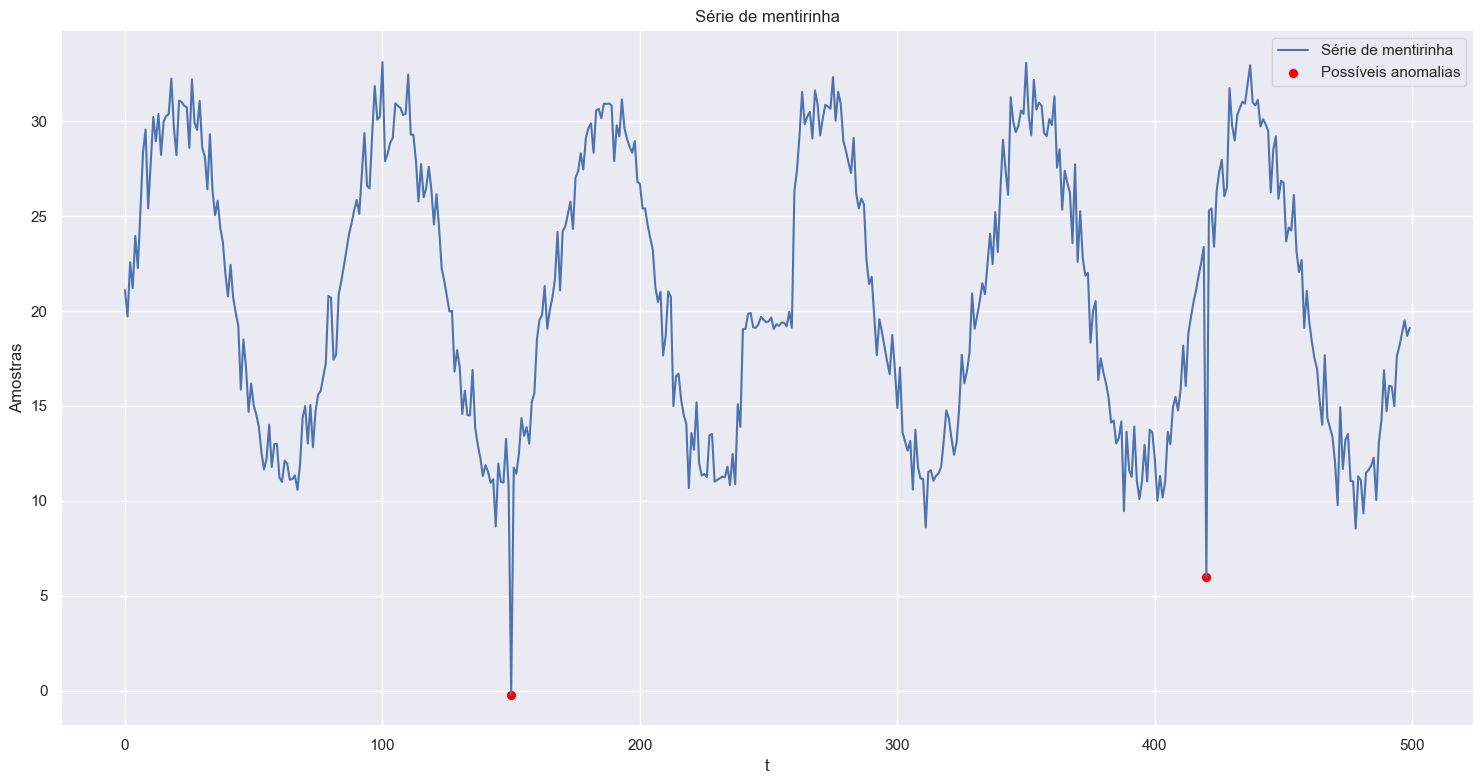

In [10]:
plt.plot(data, label="Série de mentirinha")
plt.scatter(k_idx, data[k_idx], s=32, color="red", label="Possíveis anomalias")
plt.title("Série de mentirinha")
plt.xlabel("t")
plt.ylabel("Amostras")
plt.legend()
plt.tight_layout()
plt.show()

#### _Como??? n=9?????_

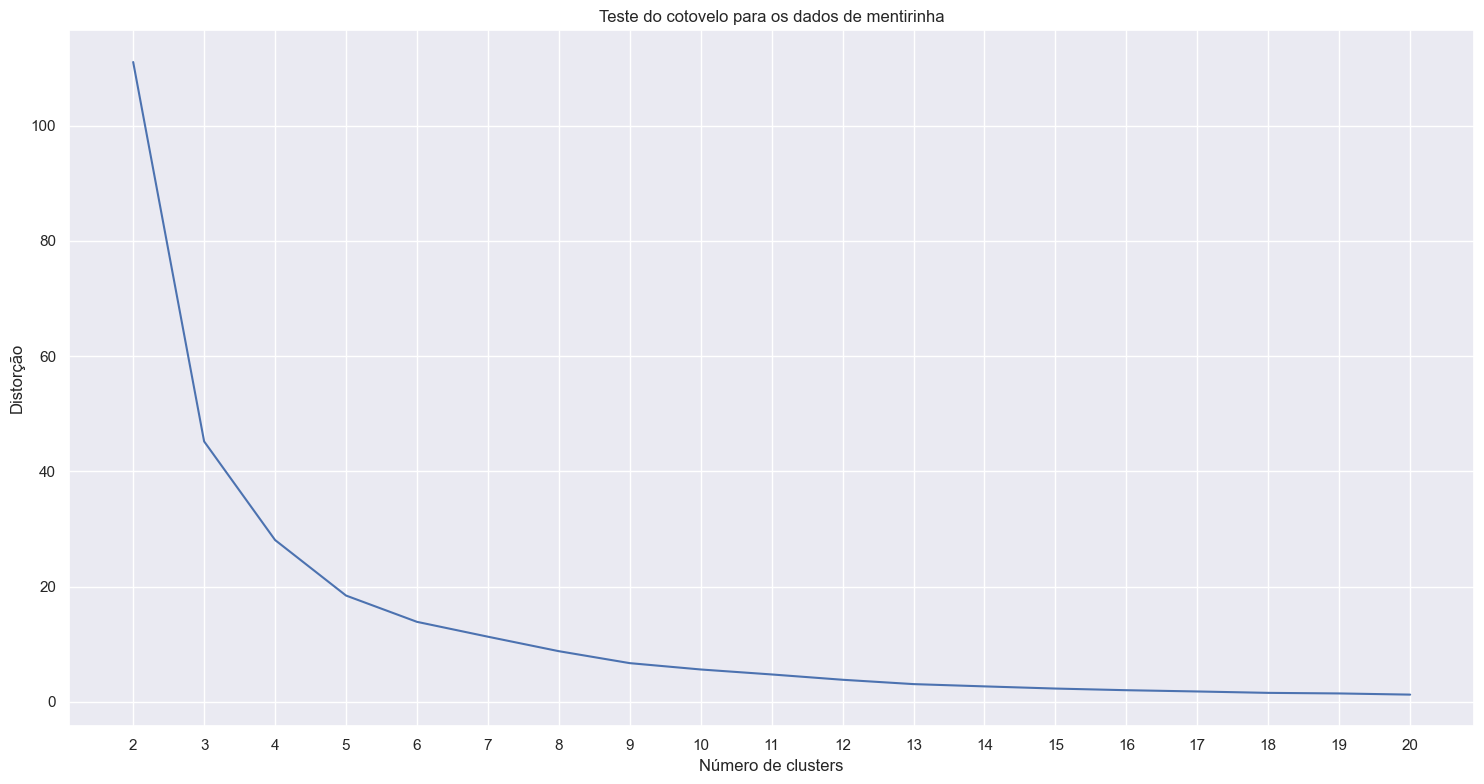

In [11]:
cluster_sizes = list(range(2, 21))
distortions = []
for k in cluster_sizes:
    kmeans_test = KMeans(n_clusters=k)
    kmeans_test = kmeans_test.fit(data_scaled)
    distortions.append(kmeans_test.inertia_)

plt.title("Teste do cotovelo para os dados de mentirinha")
plt.plot(cluster_sizes, distortions)
plt.xticks(ticks=cluster_sizes, labels=cluster_sizes)
plt.xlabel("Número de clusters")
plt.ylabel("Distorção")
plt.tight_layout()
plt.show()

### Detecção de anomalias usando predição

- ARIMA/SARIMA/SARIMAX

In [18]:
import statsmodels.api as sm

In [13]:
data[150] = 11

In [14]:
y_train = data[:230]

In [15]:
model = sm.tsa.statespace.SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 90))
results = model.fit()

C:\Users\Artur\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [16]:
y_pred = results.predict(start=230, end=300, dynamic=True)

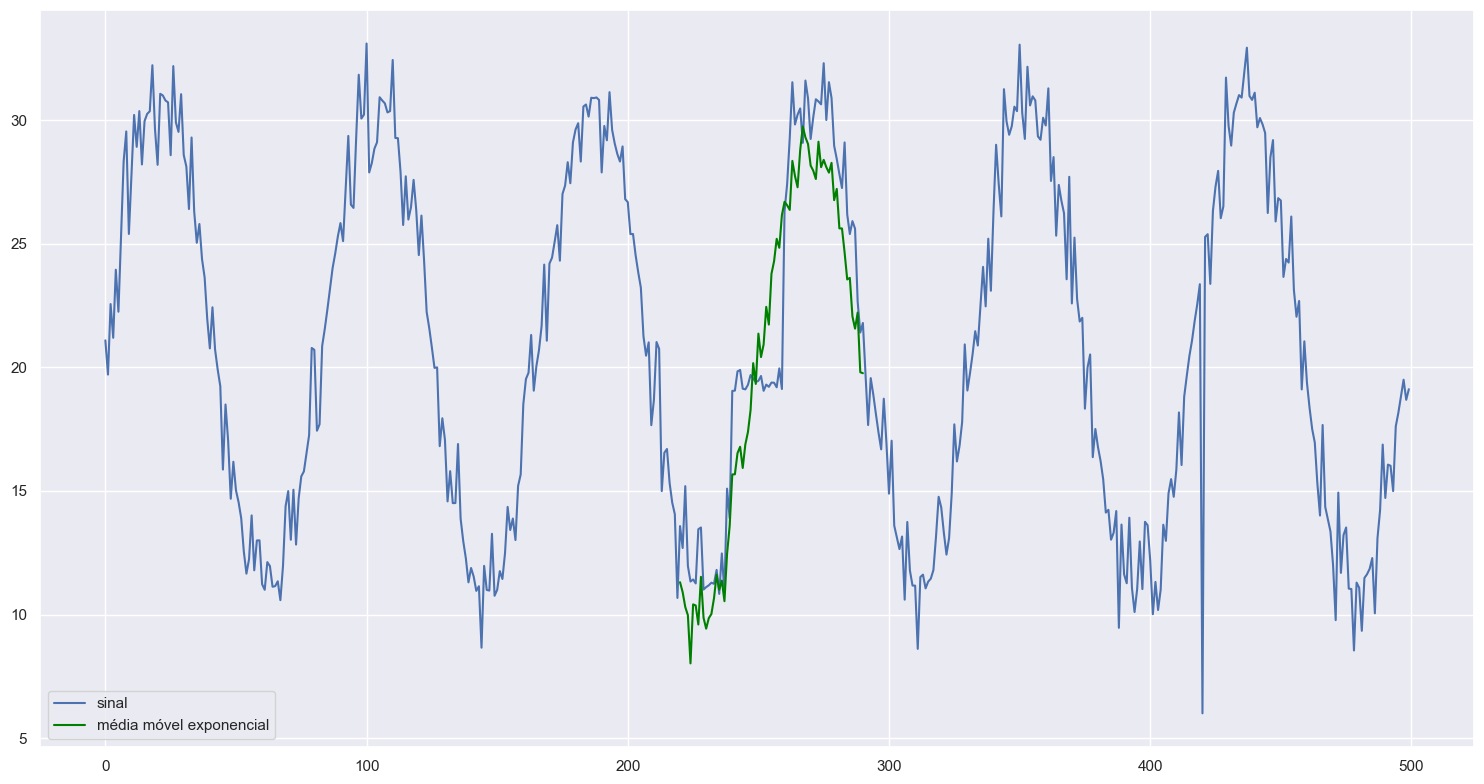

In [17]:
plt.plot(data, label="sinal")
plt.plot(range(220, 291), y_pred, label="média móvel exponencial", color="green")
plt.legend()
plt.tight_layout()
plt.show()

## O que mais você pode estudar

1. Se você for uma pessoa das redes neurais: _Autoencoders_ e _SOM_ (mapas auto-organizáveis de Kohonen)
2. Se você não tem problemas com o Facebook: _Prophet_
3. Se você curte uma clusterizaçãozinha: _DBSCAN_ (cuidado com a sua RAM)
4. Se você gosta de uma curva normal: _Mistura de Gaussianas_

## Bons estudos! :-)